In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
from scipy import stats
import scipy
import datetime
import math
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("FinalDataset-1990-2018.csv")
data_temp1 = np.array(data['TAVG'])
data_temp = data['TAVG'] - data['TAVG'].shift(1)
# Defining the error functions

def SSE(x):
    x_bar = np.mean(x)
    sse = 0
    for i in x:
        sse += (i-x_bar)**2
    return(sse)
    
def MAPE(y, y_hat):
    temp = 0
    for i in range(len(y)):
        temp += abs((y[i]-y_hat[i])/y[i])
    temp = (100/len(y))*temp
    return(temp)



In [3]:
### 1. Temperature change -- Walds test

n,_ = data.shape
theta_0 = 0 #true value
theta_cap = data_temp.mean() #estimated value
se = se_not = data_temp.std()/math.sqrt(n) #standard error of the data - this another statistic used
print(theta_cap)
w = (theta_cap - theta_0)/se

print("test statistic %f"%w) #reject/accept based on the alpha value assumed.

-0.02202380952380954
test statistic -0.052062


In [4]:
### 2. Corelation test
corelation = data['TAVG'].corr(data['PCP'])



print("Correlation value = ", corelation)

scipy.stats.linregress(data["TAVG"],data["PCP"])

Correlation value =  0.27955022607251706


LinregressResult(slope=0.02495262563007171, intercept=1.4824862171852613, rvalue=0.2795502260725171, pvalue=1.8167517388959848e-07, stderr=0.004682357003532402)

In [5]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
plotly.tools.set_credentials_file(username='raghunanj', api_key='kVCWX07IGXc9DUK5USHf')

df = pd.read_csv("FinalDataset-1990-2018.csv")
df['period'] = df[['Year', 'Month']].apply(lambda x: ''.join(str(x)), axis=1)

trace_high = go.Scatter(
                x=df['period'],
                y=df['TAVG'],
                name = "Average Temperature",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_low = go.Scatter(
                x=df['period'],
                y=df['PCP'],
                name = "Precipitation Index",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data_1 = [trace_high,trace_low]

layout = dict(
    title = "Time series plot from 1990 - 2018 for each month",
    xaxis = dict(
        range = ['1990-01-01','2018-01-31'])
)




fig = dict(data=data_1, layout=layout)
py.iplot(fig, filename = "Manually Set Range")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~raghunanj/0 or inside your plot.ly account where it is named 'Manually Set Range'


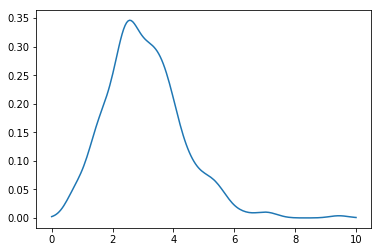

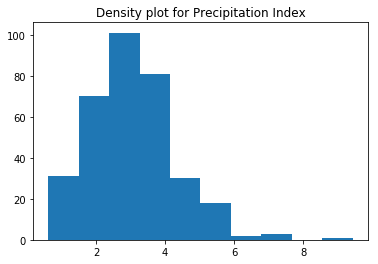

Ks_2sampResult(statistic=0.06824925816023741, pvalue=0.40009675429448005)


In [6]:
# #print(data_input)
data = pd.read_csv("FinalDataset-1990-2018.csv")
x_axis = np.array(data[['PCP']])
y_axis = np.array(data[['TAVG']])
# linreg = LinearRegression()
# model = linreg.fit(x_axis, y_axis)
# model.coef_


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
# data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8
density = gaussian_kde(data['PCP'])
xs = np.linspace(0,10,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()


plt.hist(x_axis)
plt.title("Density plot for Precipitation Index")
plt.show()


# ks_results = scipy.stats.kstest(x_axis, cdf='norm')
# print ("ks_statistic", ks_results )


theta_cap_dist = pd.Series(data['PCP']) #my data
norm_dist = np.random.normal(loc=data['PCP'].mean(), scale=data['PCP'].std(), size=337) #generating a normal distribution
print(scipy.stats.ks_2samp(theta_cap_dist,norm_dist)) #check the score


# plt.figure(figsize=(10,10))
# plt.title("Residual vs Predicted PTS")
# plt.scatter(x_axis, y_axis)
# plt.xlabel('PTS')
# plt.ylabel('Residuals')
# plt.savefig('Residual1vsPredictedPTS', dpi=250)
# plt.show()

# pred = x_train.dot(beta_hat)

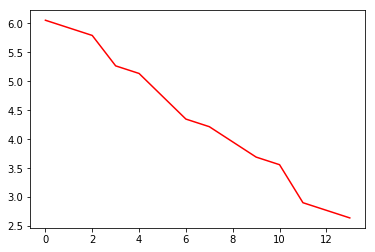

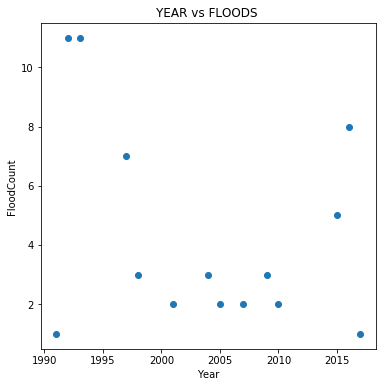

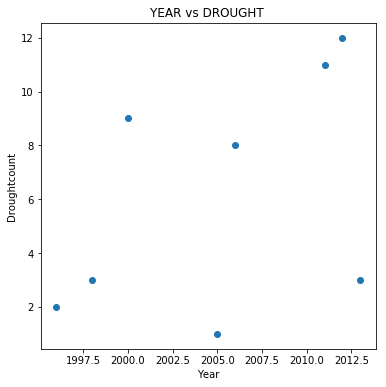

In [7]:
###3. Flood Vs Drought
data = pd.read_csv("FinalDataset-1990-2018.csv")


Flood_Count = data.loc[(data['PDSI']> 3.0)].groupby(['Year']).size().reset_index(name='FloodCount')
#xi = np.arange(len(Flood_Count)
slopeF, interceptF, r_valueF, p_valueF, std_errF = stats.linregress(Flood_Count['Year'], Flood_Count['FloodCount'])
line1 = interceptF + slopeF * Flood_Count['Year']
#plt.plot(line1,'r-')
#plt.plot(Flood_Count['Year'], Flood_Count['FloodCount'],'ro')

plt.plot(line1,'r-')
# plt.plot(line2,'b-')
#plt.plot(Flood_Count['Year'], Flood_Count['FloodCount'],'ro')
plt.figure(figsize=(6,6))
plt.title("YEAR vs FLOODS ")
plt.scatter(Flood_Count['Year'], Flood_Count['FloodCount'])
plt.xlabel('Year')
plt.ylabel('FloodCount')
plt.show()


#print(t_old)
DroughtCount = data.loc[(data['PDSI']< -3.0)].groupby(['Year']).size().reset_index(name='Droughtcount')
#print(DroughtCount)
slopeD, interceptD, r_valueD, p_valueD, std_errD = stats.linregress(DroughtCount['Year'], DroughtCount['Droughtcount'])
line2 = interceptD + slopeD * DroughtCount['Year']

#plt.plot(Flood_Count['Year'], Flood_Count['FloodCount'],'ro')
plt.figure(figsize=(6,6))
plt.title("YEAR vs DROUGHT ")
plt.scatter(DroughtCount['Year'], DroughtCount['Droughtcount'])
plt.xlabel('Year')
plt.ylabel('Droughtcount')
plt.show()


# Avg_Temperature = data.loc[data['TAVG']].groupby(['Year']).mean() #.reset_index(name='TAVG')
# print (Avg_Temperature)
# Avg_Temperature = Avg_Temperature [['TAVG']]
